# Predictive Employee Turnover
## Final Project
Ana André, Data Squad #21 | Lisboa, 2019.10.11

## Data wrangling, cleaning and exploratory data analysis
- [1. Data wrangling and cleaning](#cleaning)
- [2. Exploratory data analysis](#eda)

<a name="cleaning"></a>
## 1. Data wrangling and cleaning


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# display full output and not only the last result
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

%config InlineBackend.figure_format ='retina'
%matplotlib inline

### Load the data

In [3]:
# load the data
data = pd.read_csv('../1_Data/kaggle_original_data/HR_comma_sep_14000.csv')#, header = None) # cleaned dataset
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Overview of the data

In [4]:
data.shape

(14999, 10)

In [5]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [6]:
# rename column 'sales'
data.rename(columns={'sales':'department'},
           inplace = True)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
# checking for missing values
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [8]:
# general overview of the data
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
# checking data types
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [10]:
# add column with the average weekly hour
data['avg_weekly_hours'] = data.average_montly_hours / 4
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,avg_weekly_hours
0,0.38,0.53,2,157,3,0,1,0,sales,low,39.25
1,0.80,0.86,5,262,6,0,1,0,sales,medium,65.50
2,0.11,0.88,7,272,4,0,1,0,sales,medium,68.00
3,0.72,0.87,5,223,5,0,1,0,sales,low,55.75
4,0.37,0.52,2,159,3,0,1,0,sales,low,39.75


### Save as csv file

In [11]:
data.to_csv('../1_Data/clean_data/HR_clean_data.csv')

<a name="eda"></a>
## 2. Exploratory data analysis

In [12]:
# config plot settings
sns.set_context('notebook')
plt.style.use('seaborn')

### Turnover by department

In [13]:
# group by department
turnover_dept= data.groupby('department').agg({'department':'count','left':'sum'})

# rename 'department' column
turnover_dept.rename(columns= {'department':'no_of_emp'}, inplace = True)

# sort departments by total number of employees
turnover_dept = turnover_dept.sort_values(by= 'no_of_emp', ascending= False)

turnover_dept.head(10)

,no_of_emp,left
department,,
sales,4140,1014
technical,2720,697
support,2229,555
IT,1227,273
product_mng,902,198
marketing,858,203
RandD,787,121
accounting,767,204
hr,739,215


In [14]:
turnover_dept.index

Index(['sales', 'technical', 'support', 'IT', 'product_mng', 'marketing',
       'RandD', 'accounting', 'hr', 'management'],
      dtype='object', name='department')

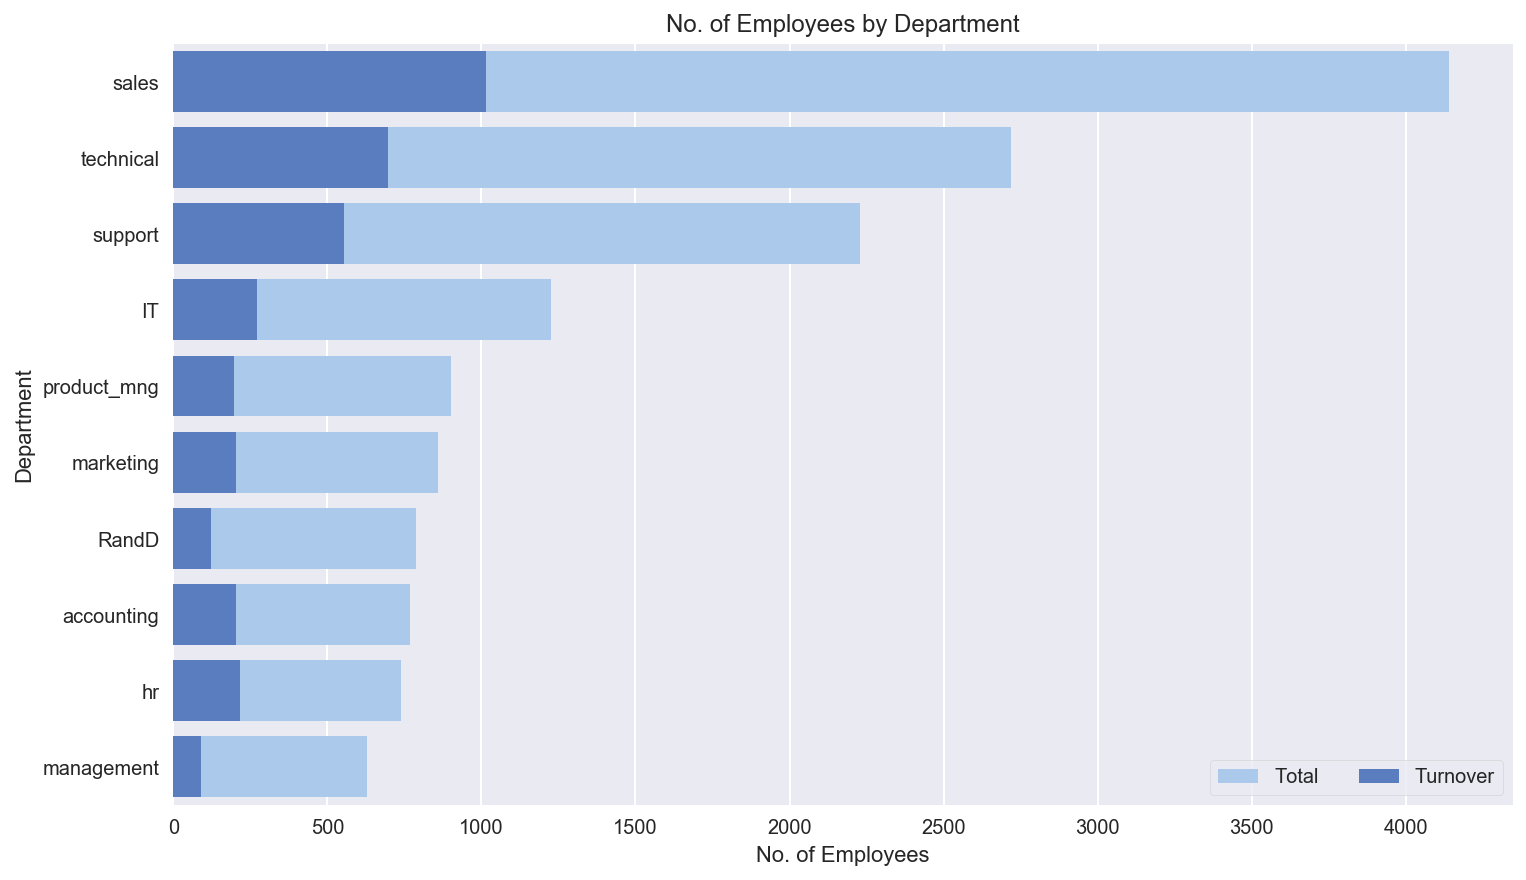

In [15]:
# initialize the matplotlib figure
f, ax = plt.subplots(figsize= (12,7))

# plot total number of employees by department
sns.set_color_codes('pastel')
sns.barplot(x= 'no_of_emp', y= turnover_dept.index, data= turnover_dept,
            label= 'Total', color= 'b')

# plot turnover by department
sns.set_color_codes('muted')
sns.barplot(x= 'left', y= turnover_dept.index, data= turnover_dept,
           label= 'Turnover', color= 'b')

# add a legend and informative axis label
ax.legend(ncol= 2, loc= "lower right", frameon= True)
ax.set(ylabel= 'Department', xlabel= "No. of Employees", title= 'No. of Employees by Department')#, fontsize= 16)
#sns.despine(left=True, bottom=True)

plt.show()

### Years in the company

In [16]:
data.time_spend_company.unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [17]:
# bin the number of years in the company by 'seniority level'
bins= [0,3,6,9,data.time_spend_company.max()]
labels= ['less than 3', '3 to 6', '6 to 9', 'more than 9']
data['years_bin']= pd.cut(data['time_spend_company'], bins= bins, labels= labels)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,avg_weekly_hours,years_bin
0,0.38,0.53,2,157,3,0,1,0,sales,low,39.25,less than 3
1,0.80,0.86,5,262,6,0,1,0,sales,medium,65.50,3 to 6
2,0.11,0.88,7,272,4,0,1,0,sales,medium,68.00,3 to 6
3,0.72,0.87,5,223,5,0,1,0,sales,low,55.75,3 to 6
4,0.37,0.52,2,159,3,0,1,0,sales,low,39.75,less than 3


In [18]:
data.years_bin.unique()

[less than 3, 3 to 6, 6 to 9, more than 9]
Categories (4, object): [less than 3 < 3 to 6 < 6 to 9 < more than 9]

In [91]:
# group by number of years in the company
years= data.groupby('years_bin').agg({'department':'count','left':'sum'}).sort_values(by= 'department', ascending= False)
years['ratio_total'] = ((years.department / years.department.sum()) * 100).round(2)
years['ratio_left'] = ((years.left / years.left.sum()) * 100).round(2)

years.head()

,department,left,ratio_total,ratio_left
years_bin,,,,
less than 3,9687,1639,64.58,45.9
3 to 6,4748,1932,31.66,54.1
6 to 9,350,0,2.33,0.0
more than 9,214,0,1.43,0.0


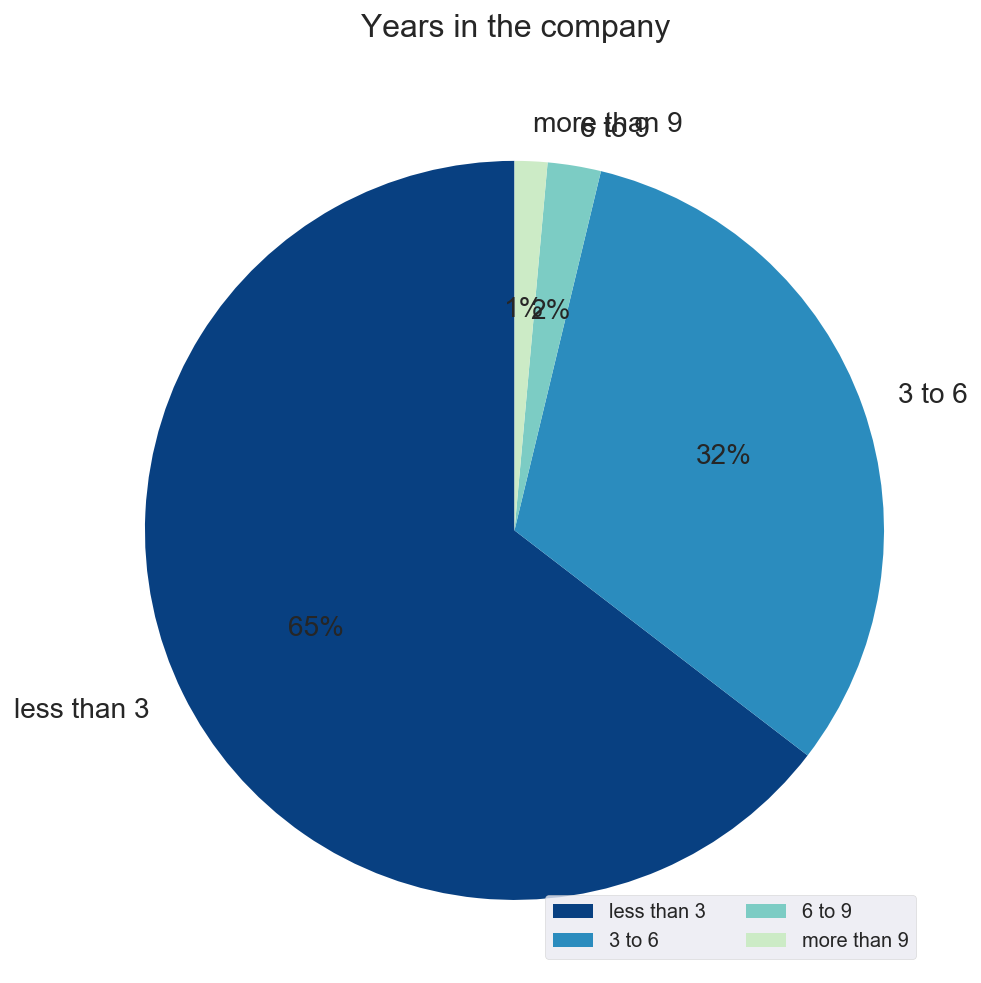

In [90]:
# initialize the matplotlib figure
f, ax = plt.subplots(figsize= (7,7))

# labels and colors
pie_labels = years.index
cmap = plt.get_cmap('GnBu_r')
colors = [cmap(1 * i/len(years.ratio_total)) for i in range(len(years.ratio_total))]

# plot total number of years in the company
ax.pie(years.ratio_total, labels= pie_labels, colors= colors, autopct='%1.0f%%', startangle=90, textprops={'fontsize': 14})

# add a legend and informative axis label
ax.axis('equal')
ax.legend(ncol= 2, loc= "lower right", frameon= True, fontsize= 10)
ax.set_title('Years in the company', loc='center', pad= 30, fontsize= 16)

plt.tight_layout()
plt.show()

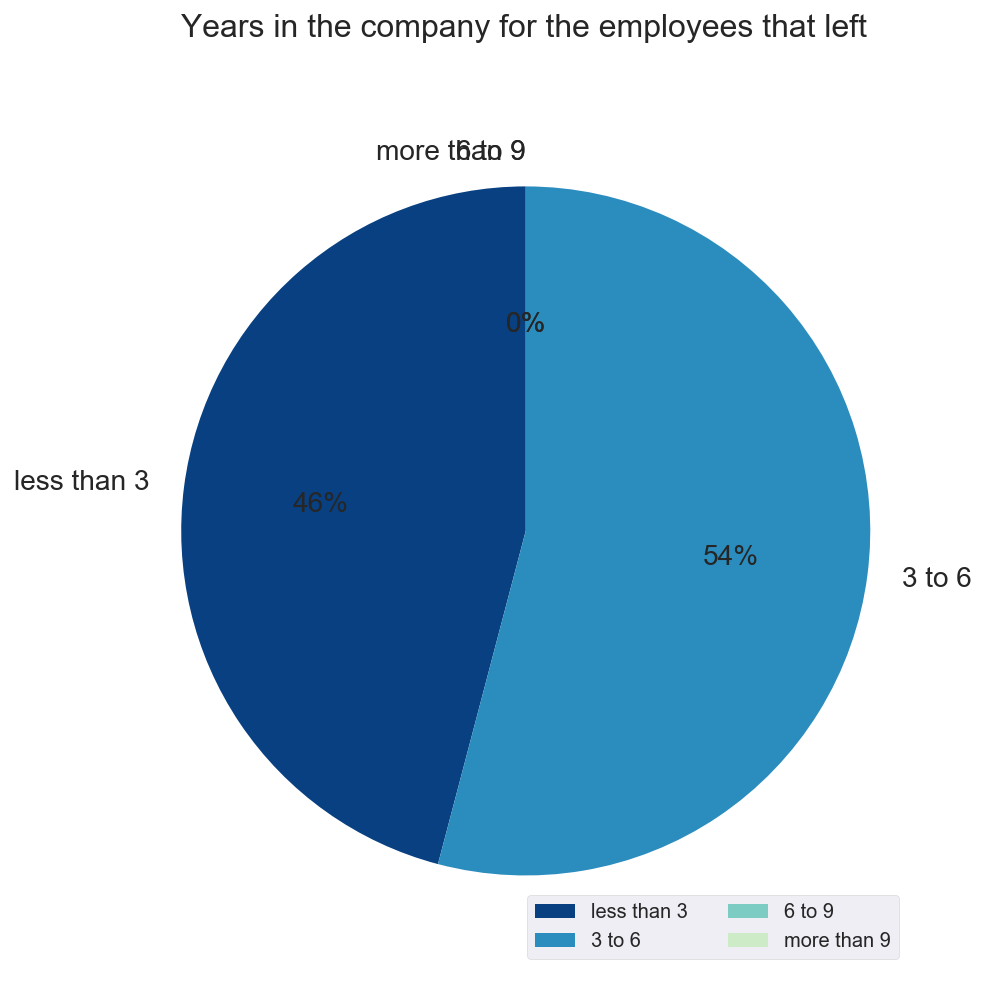

In [92]:
# initialize the matplotlib figure
f, ax = plt.subplots(figsize= (7,7))

# labels and colors
pie_labels = years.index
cmap = plt.get_cmap('GnBu_r')
colors = [cmap(1 * i/len(years.ratio_left)) for i in range(len(years.ratio_left))]

# plot total number of years in the company
ax.pie(years.ratio_left, labels= pie_labels, colors= colors, autopct='%1.0f%%', startangle=90, textprops={'fontsize': 14})

# add a legend and informative axis label
ax.axis('equal')
ax.legend(ncol= 2, loc= "lower right", frameon= True, fontsize= 10)
ax.set_title('Years in the company for the employees that left', loc='center', pad= 30, fontsize= 16)

plt.tight_layout()
plt.show()

In [93]:
# percentage of employees that left after 3 years in the company
100*(data.loc[data['time_spend_company'] >= 3, 'left'].sum() / data.left.sum()).round(2)

99.0

In [94]:
# percentage of employees that left during their 3rd year in the company
100*(data.loc[data['time_spend_company'] == 3, 'left'].sum() / data.left.sum()).round(2)

44.0

### Performance of the employees

In [21]:
# creating dataframe for the employees that left only
emp_quit = data[data.left == 1]
emp_quit.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,avg_weekly_hours,years_bin
0,0.38,0.53,2,157,3,0,1,0,sales,low,39.25,less than 3
1,0.80,0.86,5,262,6,0,1,0,sales,medium,65.50,3 to 6
2,0.11,0.88,7,272,4,0,1,0,sales,medium,68.00,3 to 6
3,0.72,0.87,5,223,5,0,1,0,sales,low,55.75,3 to 6
4,0.37,0.52,2,159,3,0,1,0,sales,low,39.75,less than 3


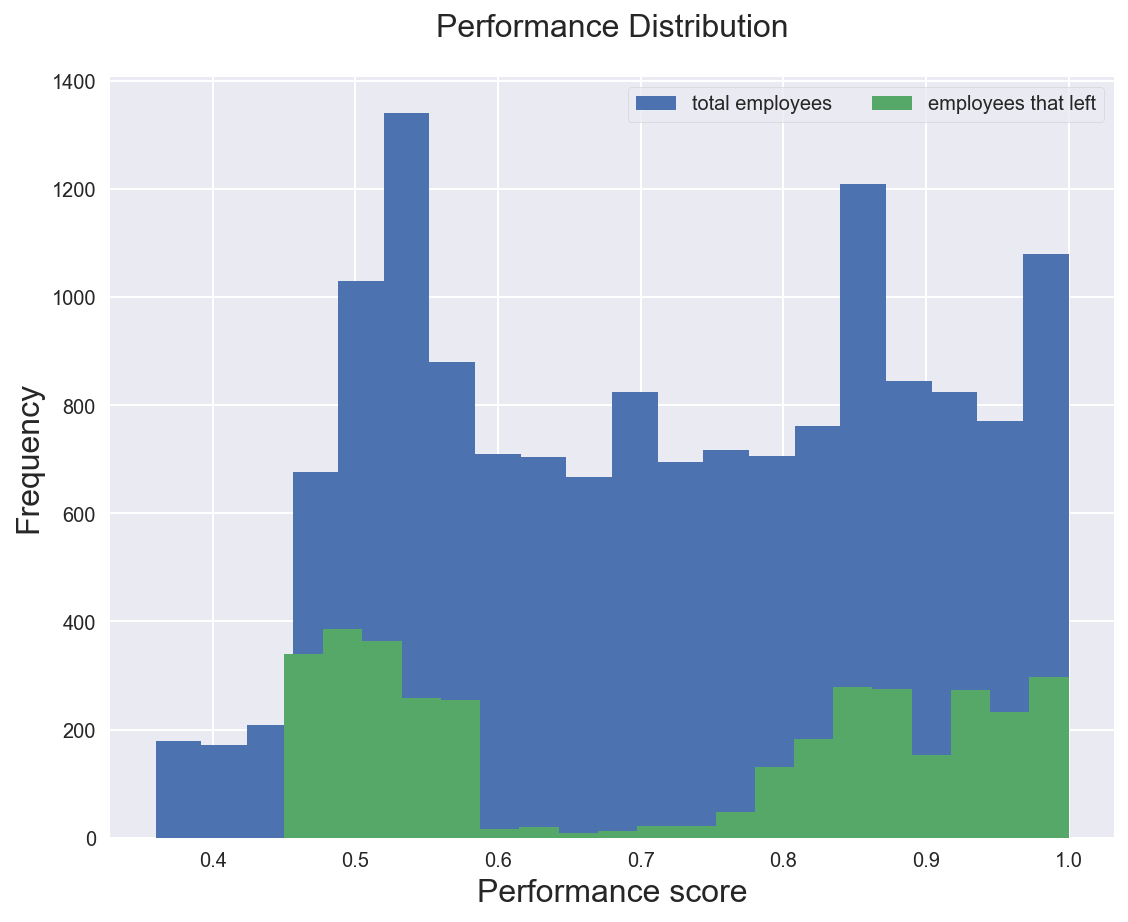

In [22]:
# initialize the matplotlib figure
f, ax = plt.subplots(figsize= (9,7))

# plot the performance distribution of total employees
plt.hist(data.last_evaluation, bins = 20)

# plot the performance distribution of the employees that left
plt.hist(emp_quit.last_evaluation, bins = 20)

# add a legend and informative axis label
ax.legend(labels= ['total employees', 'employees that left'], ncol= 2, loc= "upper right", frameon= True, fontsize= 10)
ax.set_ylabel('Frequency', fontsize= 16)
ax.set_xlabel('Performance score', fontsize= 16)
ax.set_title('Performance Distribution', loc='center', pad= 20, fontsize= 16)

plt.show()

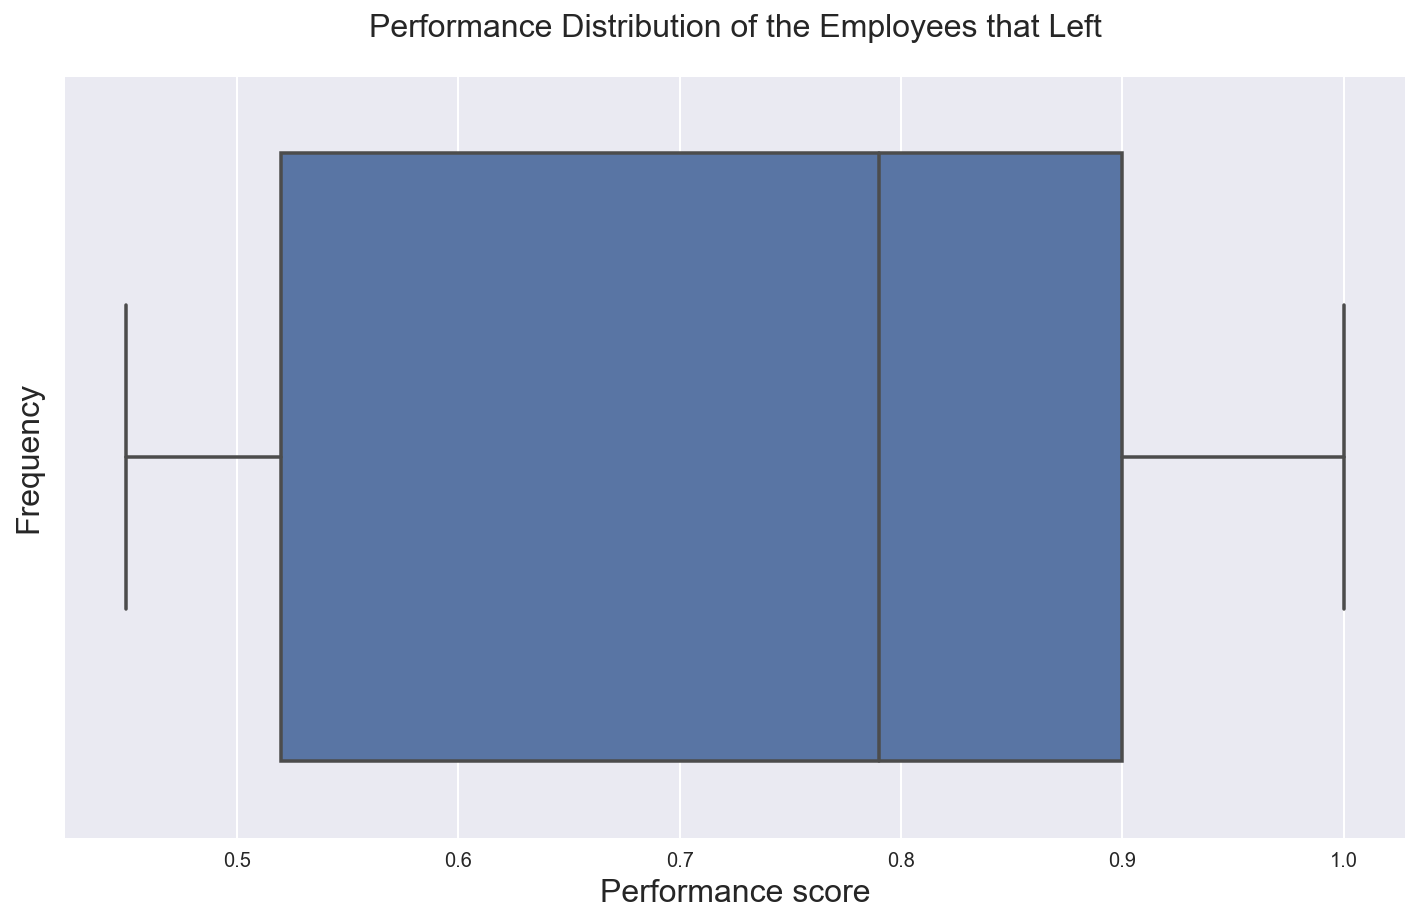

In [23]:
# initialize the matplotlib figure
f, ax = plt.subplots(figsize= (12,7))

# plot the performance distribution of the employees that left
sns.boxplot(x=emp_quit.last_evaluation)

# add a legend and informative axis label
ax.set_ylabel('Frequency', fontsize= 16)
ax.set_xlabel('Performance score', fontsize= 16)
ax.set_title('Performance Distribution of the Employees that Left', loc='center', pad= 20, fontsize= 16)

plt.show()

In [57]:
# percentage of employees that left with performance score higher than 0.5
100*(emp_quit.loc[emp_quit['last_evaluation'] > 0.5, 'left'].sum() / emp_quit.left.sum()).round(2)

80.0

In [60]:
# percentage of employees that left with performance score higher than or equal to 0.8
100*(emp_quit.loc[emp_quit['last_evaluation'] >= 0.8, 'left'].sum() / emp_quit.left.sum()).round(2)

49.0

In [61]:
# percentage of employees that left with performance score lower than or equal to 0.3
100*(emp_quit.loc[emp_quit['last_evaluation'] <= 0.3, 'left'].sum() / emp_quit.left.sum()).round(2)

0.0

### Satisfaction level

#### Employees satisfaction level

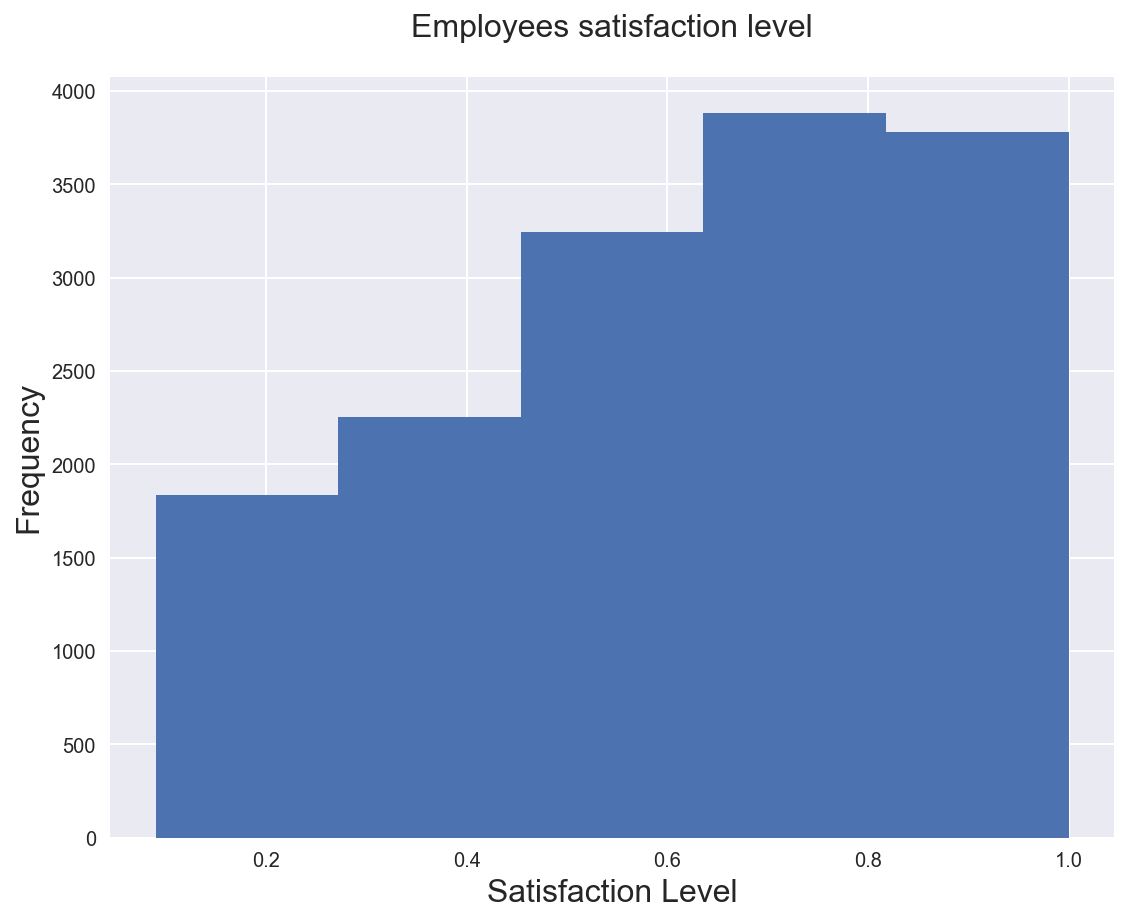

In [24]:
# initialize the matplotlib figure
f, ax = plt.subplots(figsize= (9,7))

# plot the satisfaction for all the employees
plt.hist(data.satisfaction_level,bins = 5)

# add a legend and informative axis label
ax.set_ylabel('Frequency', fontsize= 16)
ax.set_xlabel('Satisfaction Level', fontsize= 16)
ax.set_title('Employees satisfaction level', loc='center', pad= 20, fontsize= 16)

plt.show()

#### Satisfaction level of the employees that left

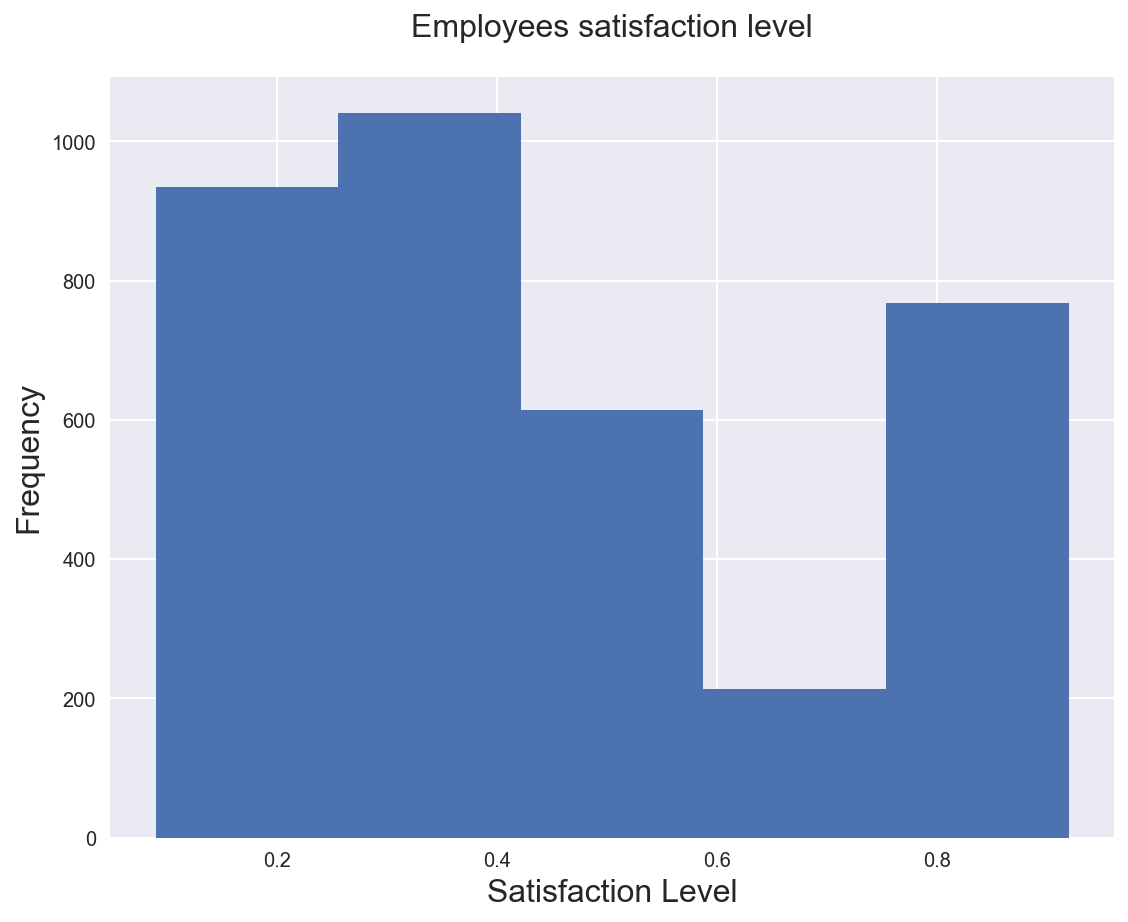

In [25]:
# initialize the matplotlib figure
f, ax = plt.subplots(figsize= (9,7))

# plot the satisfaction for the employees that left
plt.hist(emp_quit.satisfaction_level,bins = 5)

# add a legend and informative axis label
ax.set_ylabel('Frequency', fontsize= 16)
ax.set_xlabel('Satisfaction Level', fontsize= 16)
ax.set_title('Employees satisfaction level', loc='center', pad= 20, fontsize= 16)

plt.show()

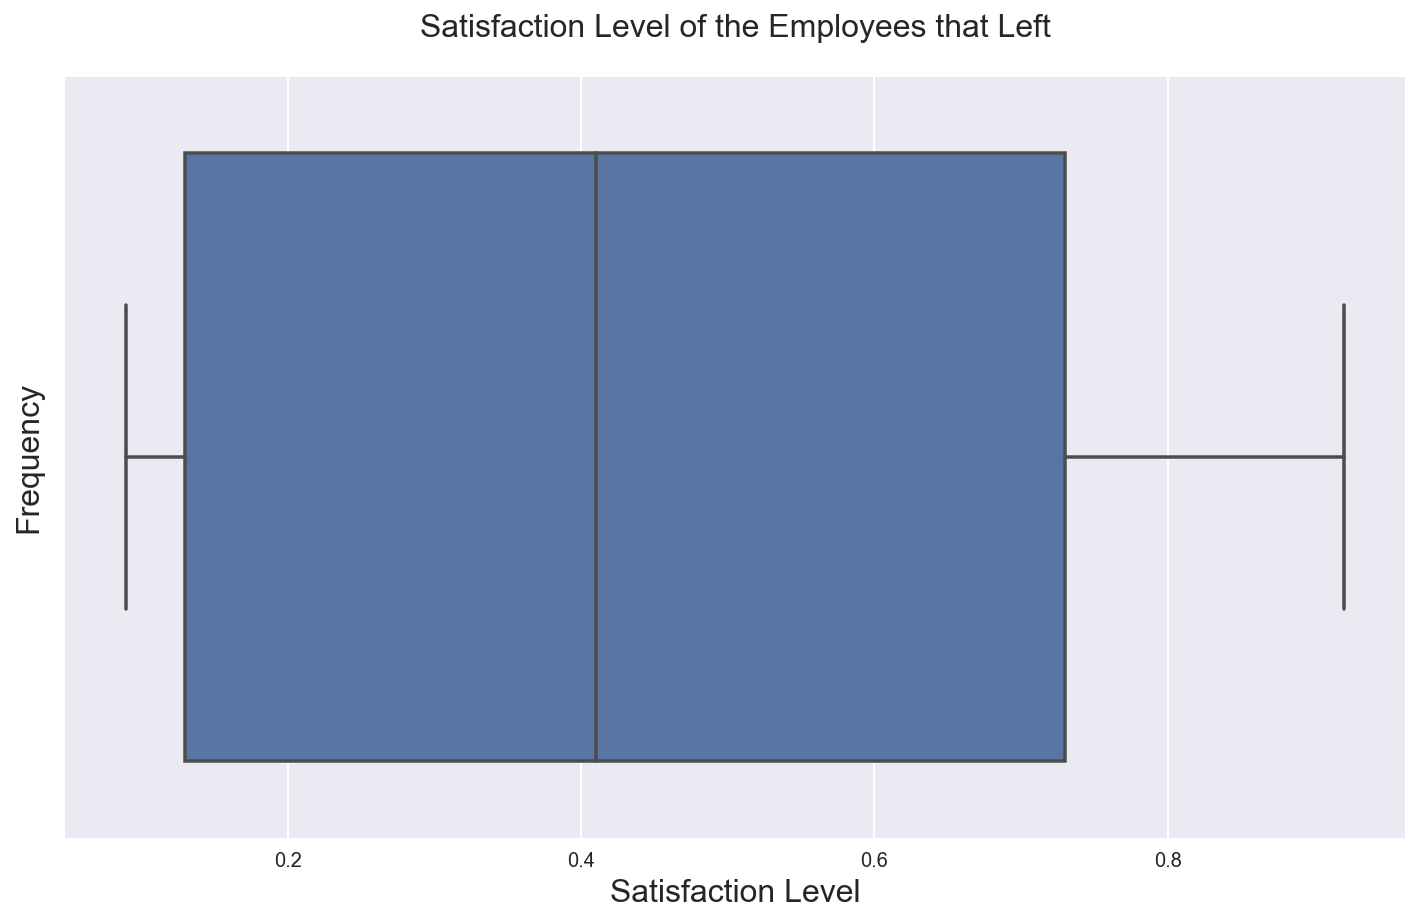

In [26]:
# initialize the matplotlib figure
f, ax = plt.subplots(figsize= (12,7))

# plot the satisfaction level distribution of the employees that left
sns.boxplot(x=emp_quit.satisfaction_level)

# add a legend and informative axis label
ax.set_ylabel('Frequency', fontsize= 16)
ax.set_xlabel('Satisfaction Level', fontsize= 16)
ax.set_title('Satisfaction Level of the Employees that Left', loc='center', pad= 20, fontsize= 16)

plt.show()

In [27]:
# percentage of employees that left with satisfaction level lower than 0.5
100*(emp_quit.loc[emp_quit['satisfaction_level'] < 0.5, 'left'].sum() / emp_quit.left.sum()).round(2)

71.0

In [28]:
# percentage of employees that left with satisfaction level higher than 0.8
100*(emp_quit.loc[emp_quit['satisfaction_level'] > 0.8, 'left'].sum() / emp_quit.left.sum()).round(2)

15.0

In [29]:
emp_quit.satisfaction_level.describe()

count    3571.000000
mean        0.440098
std         0.263933
min         0.090000
25%         0.130000
50%         0.410000
75%         0.730000
max         0.920000
Name: satisfaction_level, dtype: float64

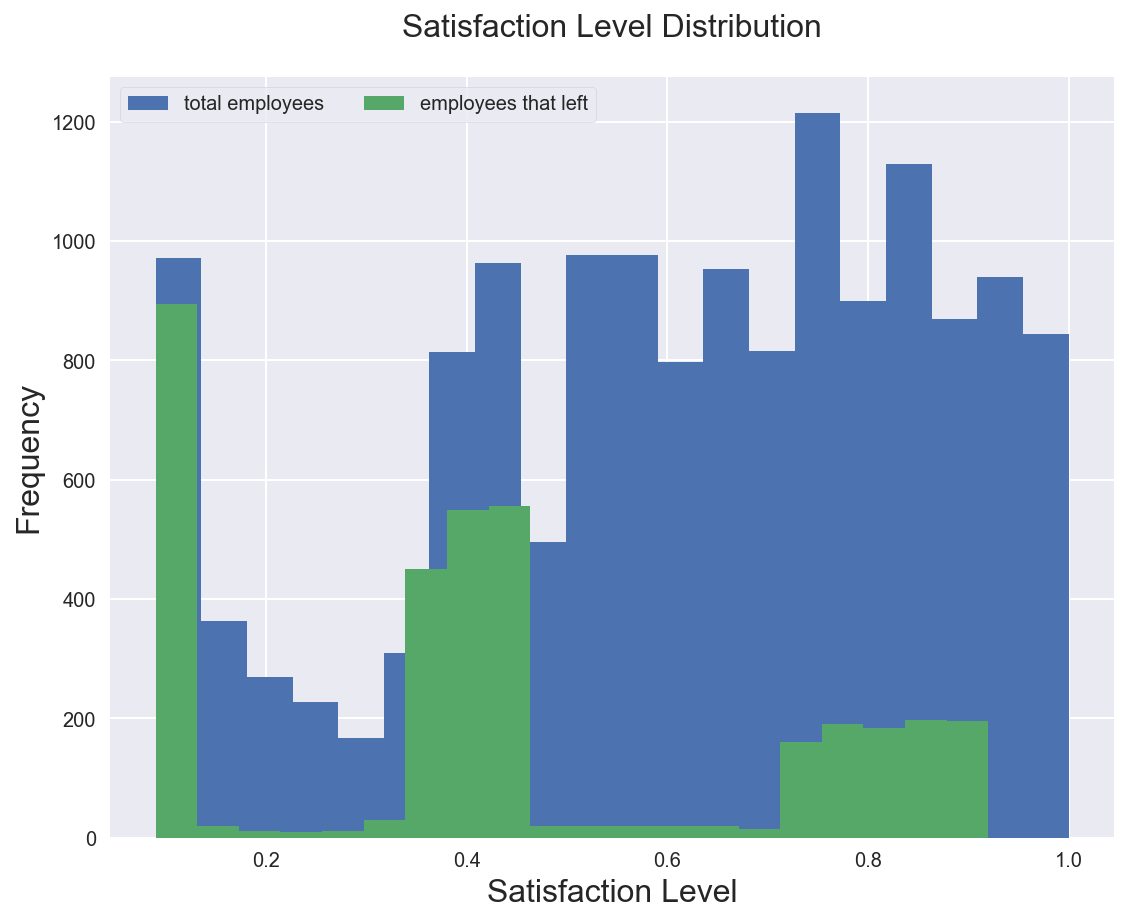

In [30]:
# initialize the matplotlib figure
f, ax = plt.subplots(figsize= (9,7))

# plot the satisfaction for all the employees
plt.hist(data.satisfaction_level, bins = 20)

# plot the satisfaction level of the employees that left
plt.hist(emp_quit.satisfaction_level, bins = 20)

# add a legend and informative axis label
ax.legend(labels= ['total employees', 'employees that left'], ncol= 2, loc= "upper left", frameon= True, fontsize= 10)
ax.set_ylabel('Frequency', fontsize= 16)
ax.set_xlabel('Satisfaction Level', fontsize= 16)
ax.set_title('Satisfaction Level Distribution', loc='center', pad= 20, fontsize= 16)

plt.show()

#### Satisfaction level by department

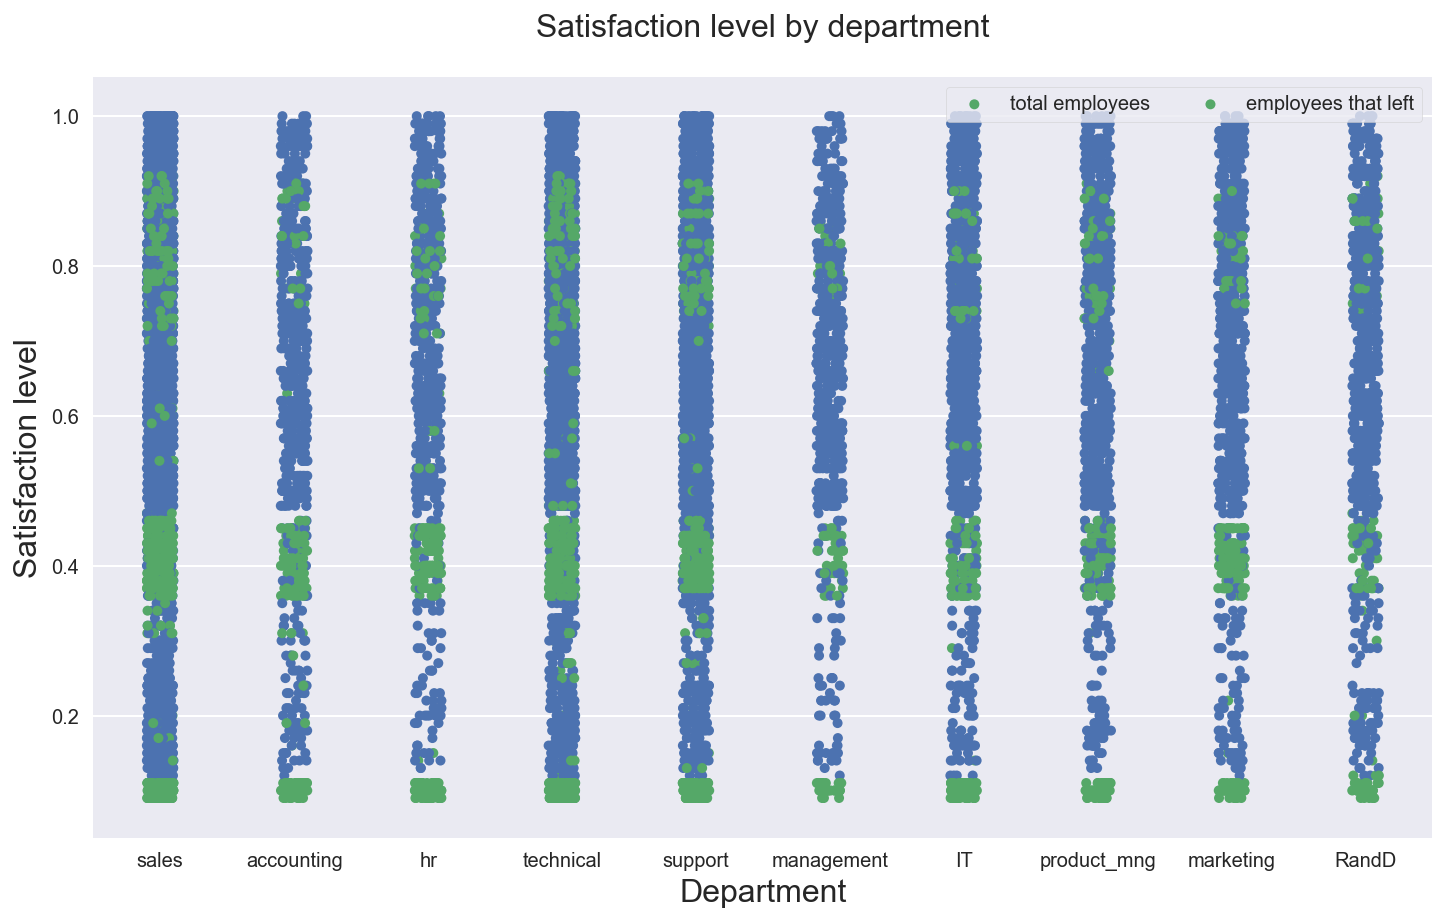

In [31]:
# initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(12,7))

# plot the satisfaction level by department
ax = sns.stripplot(x= 'department', y= 'satisfaction_level', hue= 'left', data = data, jitter= True)

# add a legend and informative axis label
ax.legend(labels= ['total employees', 'employees that left'], ncol= 2, loc= "upper right", frameon= True, fontsize= 10)
ax.set_ylabel('Satisfaction level', fontsize= 16)
ax.set_xlabel('Department', fontsize= 16)
ax.set_title('Satisfaction level by department', loc='center', pad= 20, fontsize= 16)

plt.show()

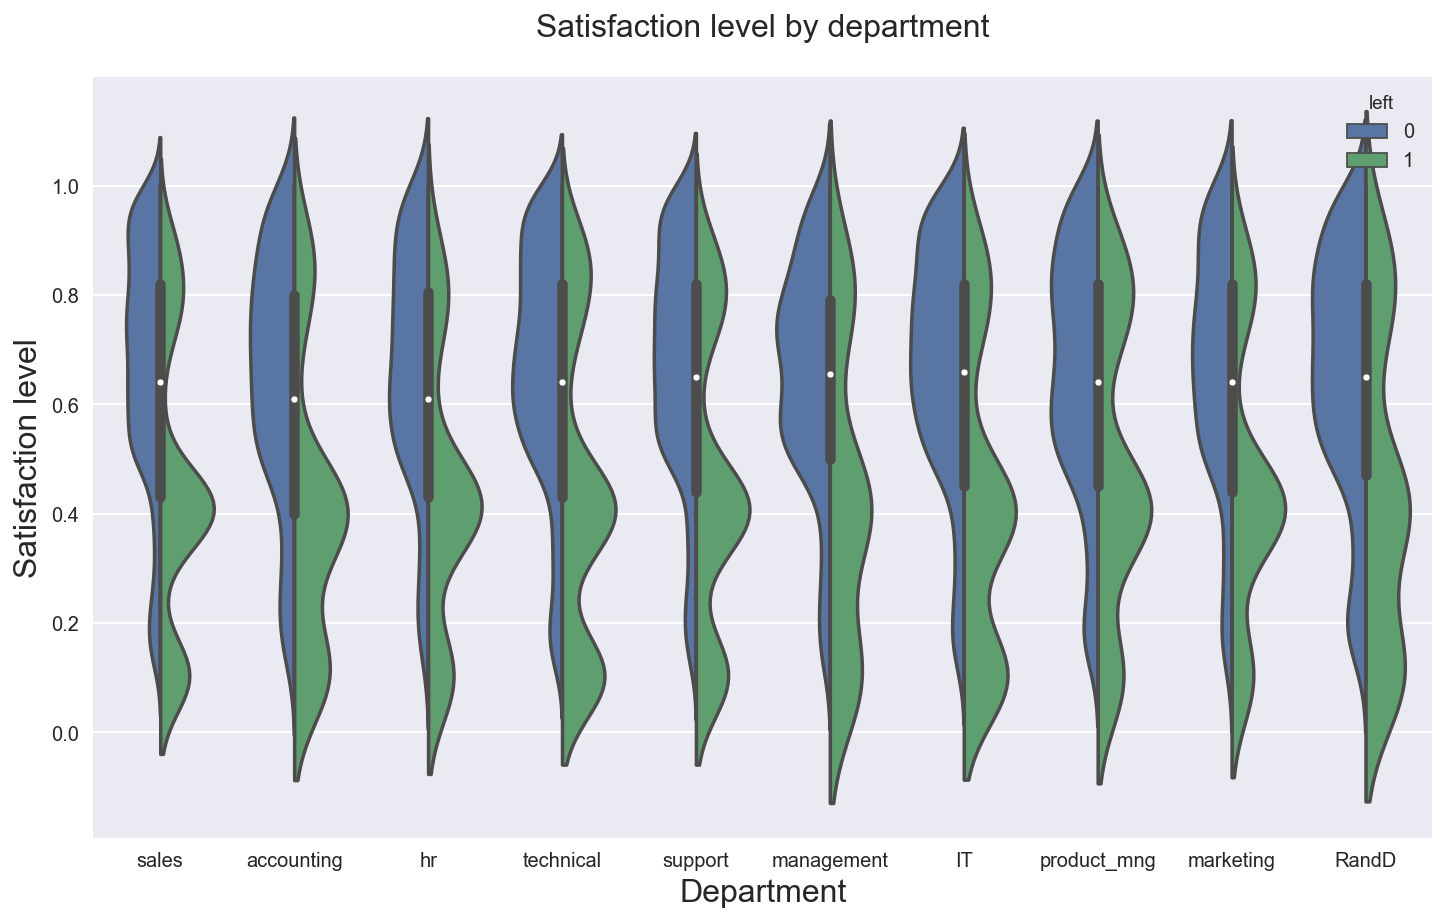

In [32]:
# initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(12,7))

# plot the satisfaction level by department
ax = sns.violinplot(x= data.department,y= data.satisfaction_level, hue= data.left, split= True)

# add a legend and informative axis label
ax.set_ylabel('Satisfaction level', fontsize= 16)
ax.set_xlabel('Department', fontsize= 16)
ax.set_title('Satisfaction level by department', loc='center', pad= 20, fontsize= 16)

plt.show()

#### Average satisfaction level by department

In [33]:
satisf_dept = data.groupby('department').agg({'satisfaction_level':'mean','department':'count'}).sort_values(by= 'satisfaction_level', ascending= False)
satisf_dept.head()

,satisfaction_level,department
department,,
management,0.621349,630
RandD,0.619822,787
product_mng,0.619634,902
marketing,0.618601,858
support,0.618300,2229


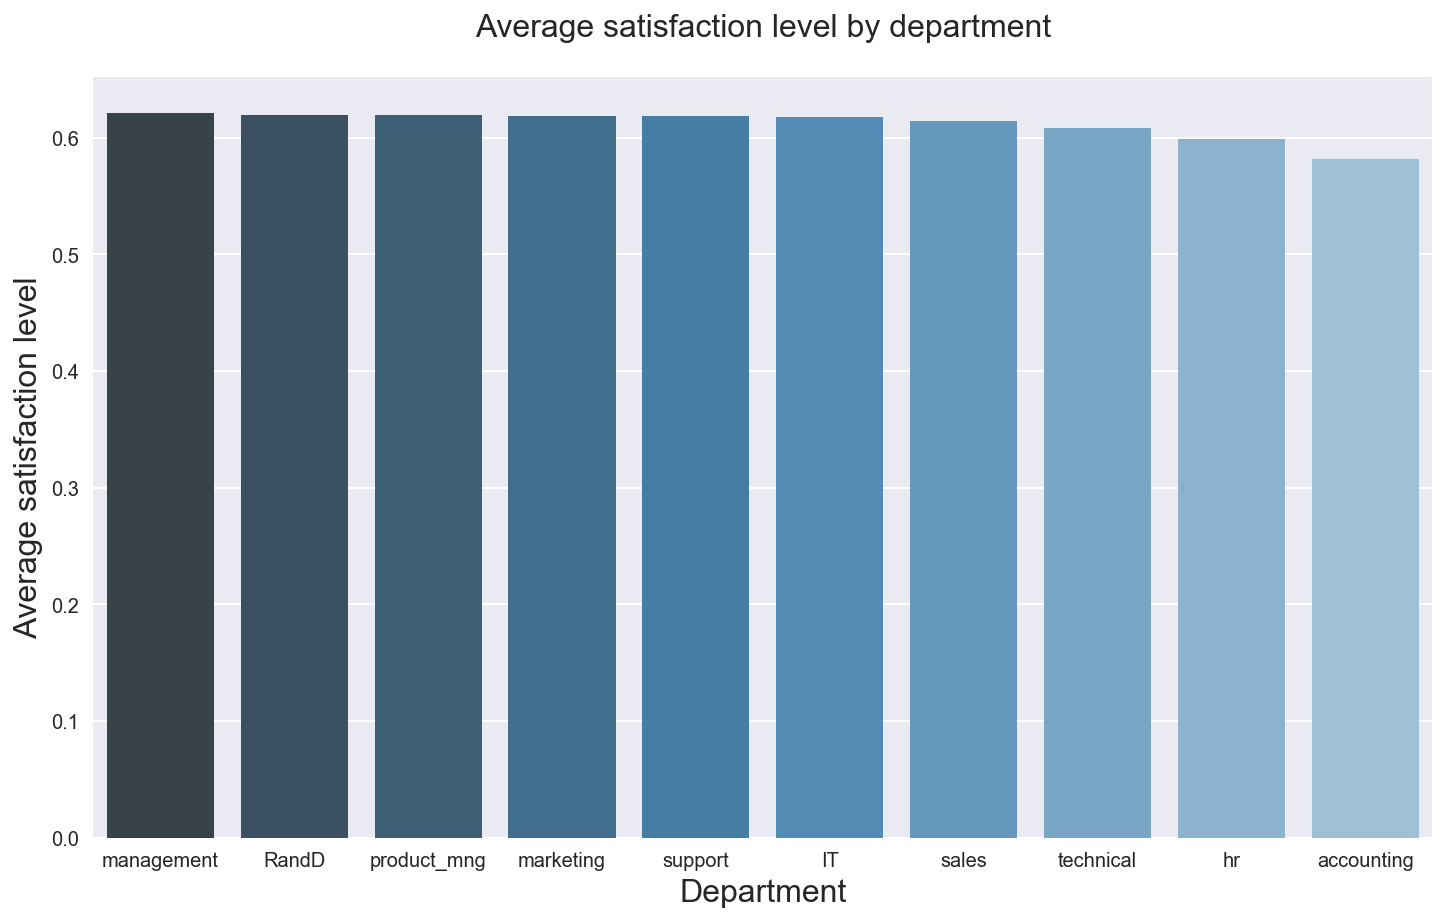

In [34]:
# initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(12,7))

# plot the average satisfaction level by department
ax = sns.barplot(x= satisf_dept.index, y= satisf_dept.satisfaction_level, palette= 'Blues_d')

# add a legend and informative axis label
ax.set_ylabel('Average satisfaction level', fontsize= 16)
ax.set_xlabel('Department', fontsize= 16)
ax.set_title('Average satisfaction level by department', loc='center', pad= 20, fontsize= 16)

plt.show()

In [ ]:
'''plots missing:
- x= satisfaction level, y= no. of employees, values = salary high, medium or low
- x= years in the company, y= no. of employees, values = salary level
- x= average WWH stacked by salary level, y= average satisfaction level
- x= salary level, y= no. of employes, hue = left
- x= stay/left, y= av. satisfaction level
- x= avg WWH stacked by stay/left, y= no. of employees
- same with years in the company instead of avg WWH
'''

In [ ]:
satisf_salary = 

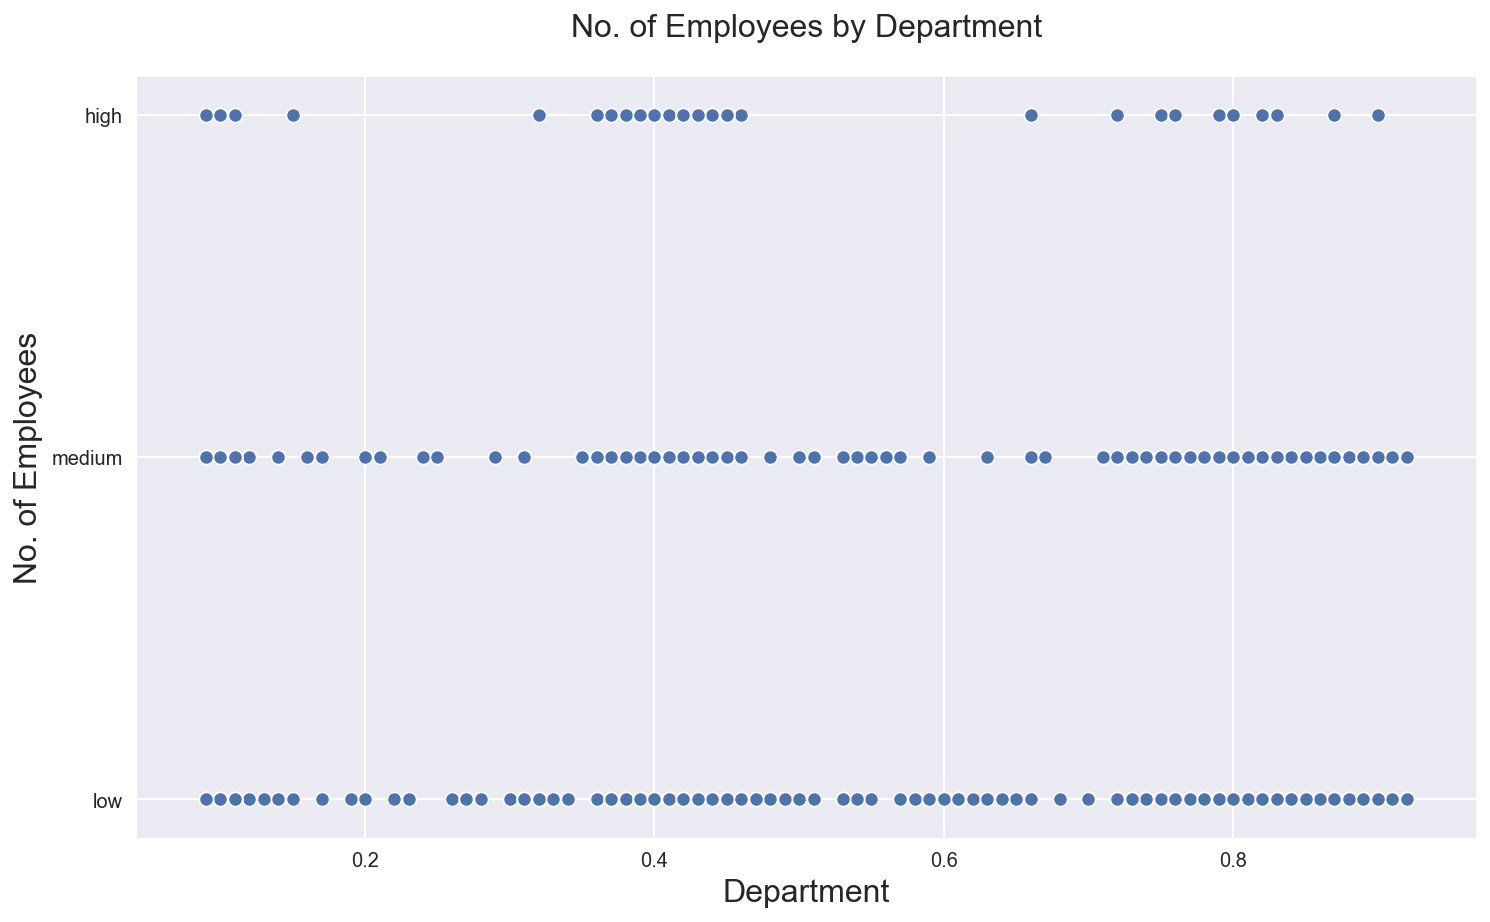

In [101]:
# initialize the matplotlib figure
f, ax = plt.subplots(figsize= (12,7))

# plot the total number of employees by department
sns.scatterplot(x= emp_quit.satisfaction_level, y= emp_quit.salary)#.value_counts().values, palette='Blues_d')

# add a legend and informative axis label
ax.set_ylabel('No. of Employees', fontsize= 16)
ax.set_xlabel('Department', fontsize= 16)
ax.set_title('No. of Employees by Department', loc='center', pad= 20, fontsize= 16)

plt.show()

### No. of employees by department

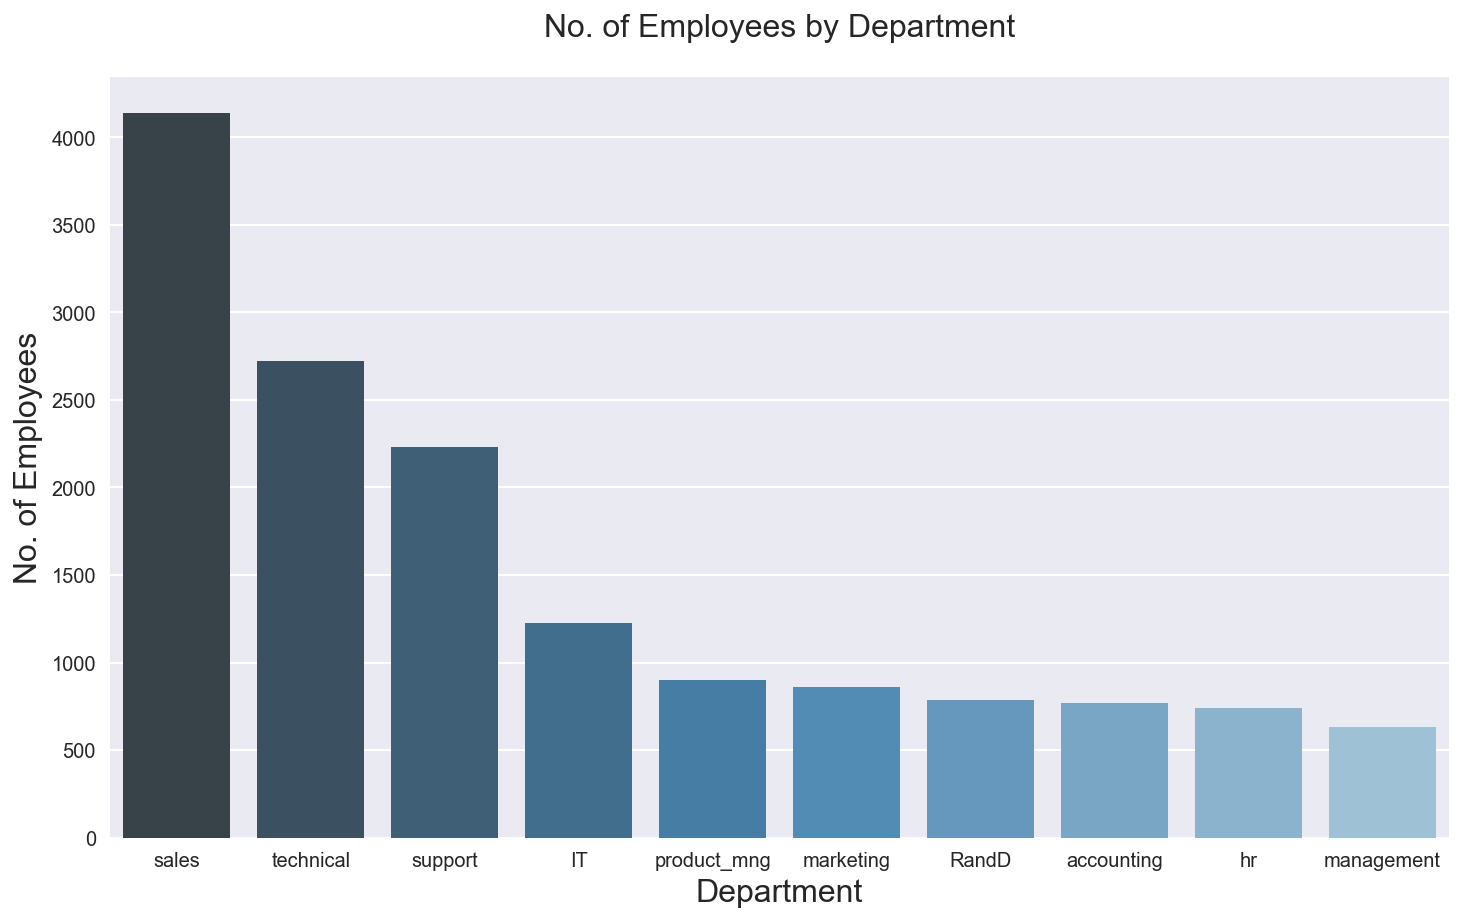

In [35]:
# initialize the matplotlib figure
f, ax = plt.subplots(figsize= (12,7))

# plot the total number of employees by department
sns.barplot(x= data.department.value_counts().index, y= data.department.value_counts().values, palette='Blues_d')

# add a legend and informative axis label
ax.set_ylabel('No. of Employees', fontsize= 16)
ax.set_xlabel('Department', fontsize= 16)
ax.set_title('No. of Employees by Department', loc='center', pad= 20, fontsize= 16)

plt.show()

### Salary Levels

#### No. of employees by salary level

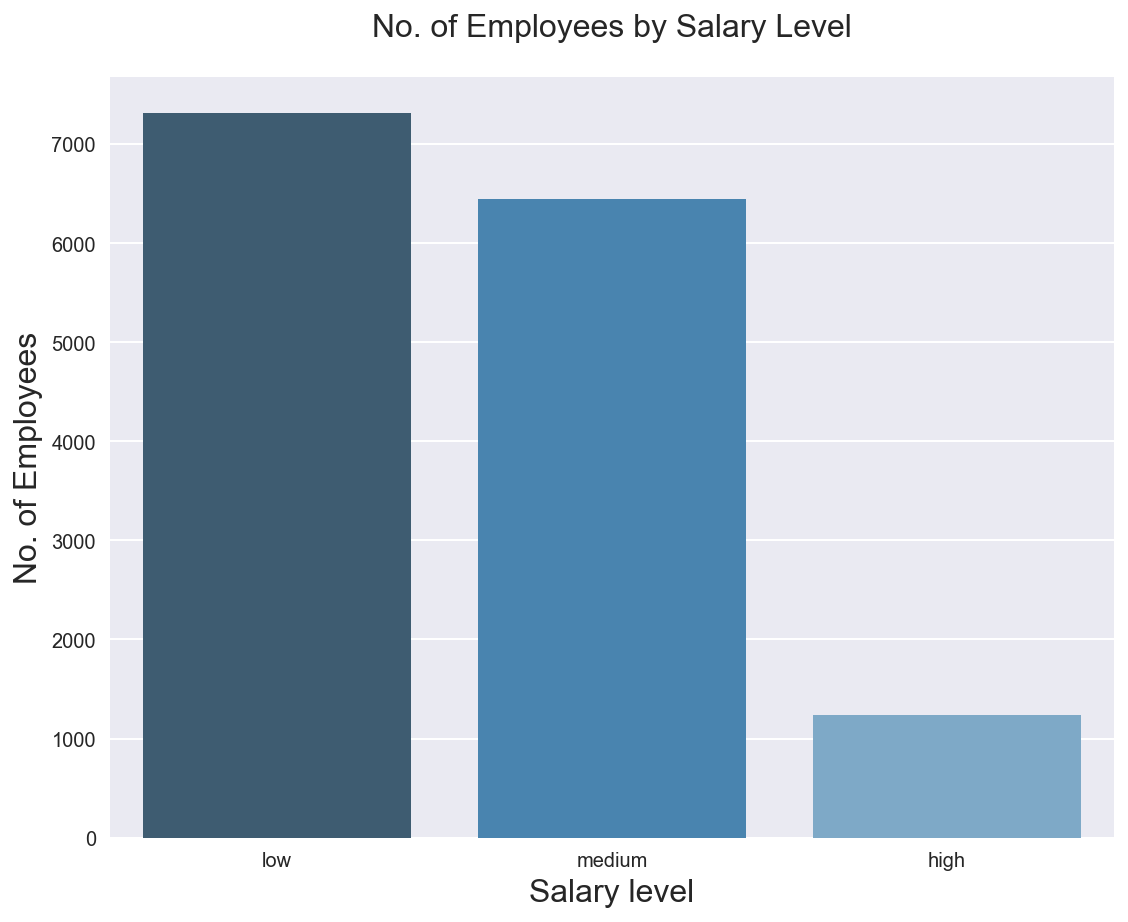

In [36]:
# initialize the matplotlib figure
f, ax = plt.subplots(figsize= (9,7))

# plot the total number of employees by salary level
sns.barplot(x= data.salary.value_counts().index, y= data.salary.value_counts().values, palette='Blues_d')

# add a legend and informative axis label
ax.set_ylabel('No. of Employees', fontsize= 16)
ax.set_xlabel('Salary level', fontsize= 16)
ax.set_title('No. of Employees by Salary Level', loc='center', pad= 20, fontsize= 16)

plt.show()

In [37]:
len(data.salary.value_counts().index)

3

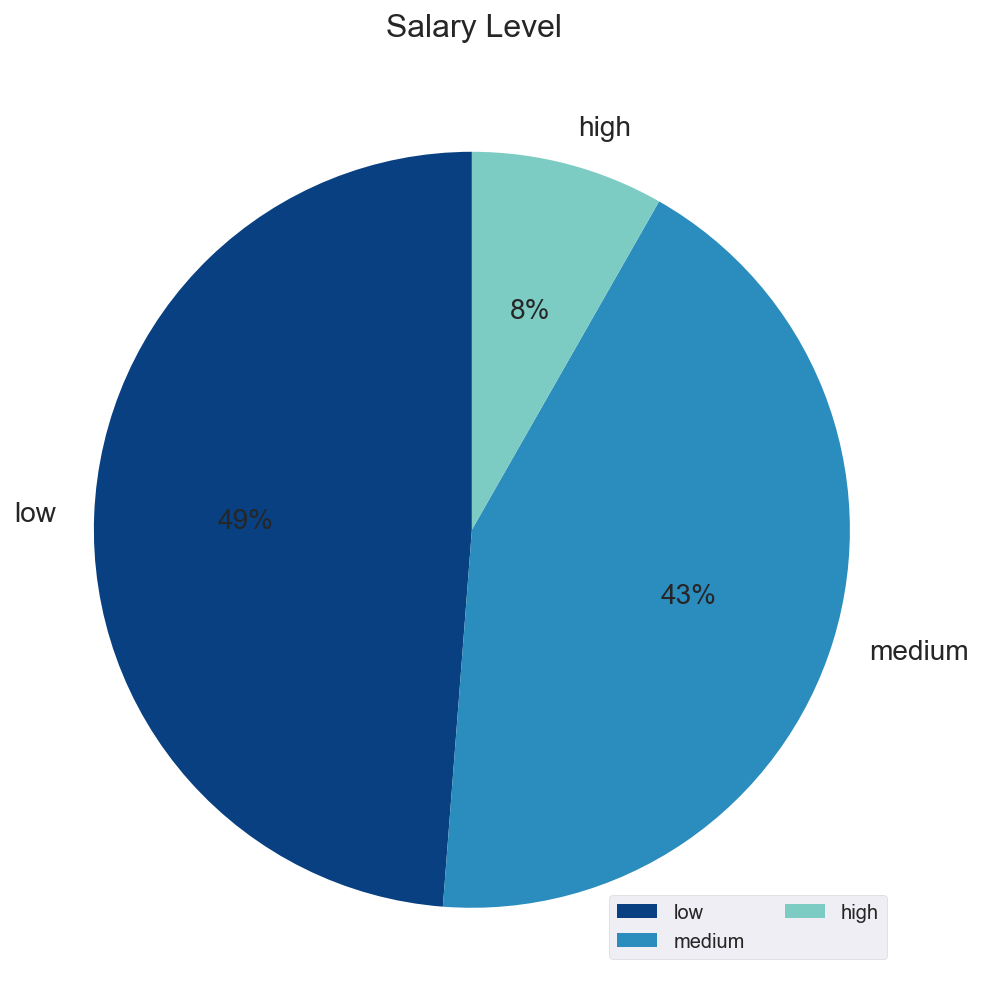

In [38]:
# initialize the matplotlib figure
f, ax = plt.subplots(figsize= (7,7))

# labels and colors
salary_pie_labels = data.salary.value_counts().index
salary_cmap = plt.get_cmap('GnBu_r')
salary_colors = [salary_cmap(1 * i/len(years.ratio_total)) for i in range(len(years.ratio_total))]

# plot salary levels ratio
ax.pie(data.salary.value_counts() / len(data.salary), labels= salary_pie_labels, colors= salary_colors, autopct='%1.0f%%', startangle=90, textprops={'fontsize': 14})

# add a legend and informative axis label
ax.axis('equal')
ax.legend(ncol= 2, loc= "lower right", frameon= True, fontsize= 10)
ax.set_title('Salary Level', loc='center', pad= 30, fontsize= 16)

plt.tight_layout()
plt.show()

The majority of the employes have low salaries and the difference in proportion  to medium pay grades employees is small.
Only 8% of the employees receive high salaries.

#### Salary levels distribution

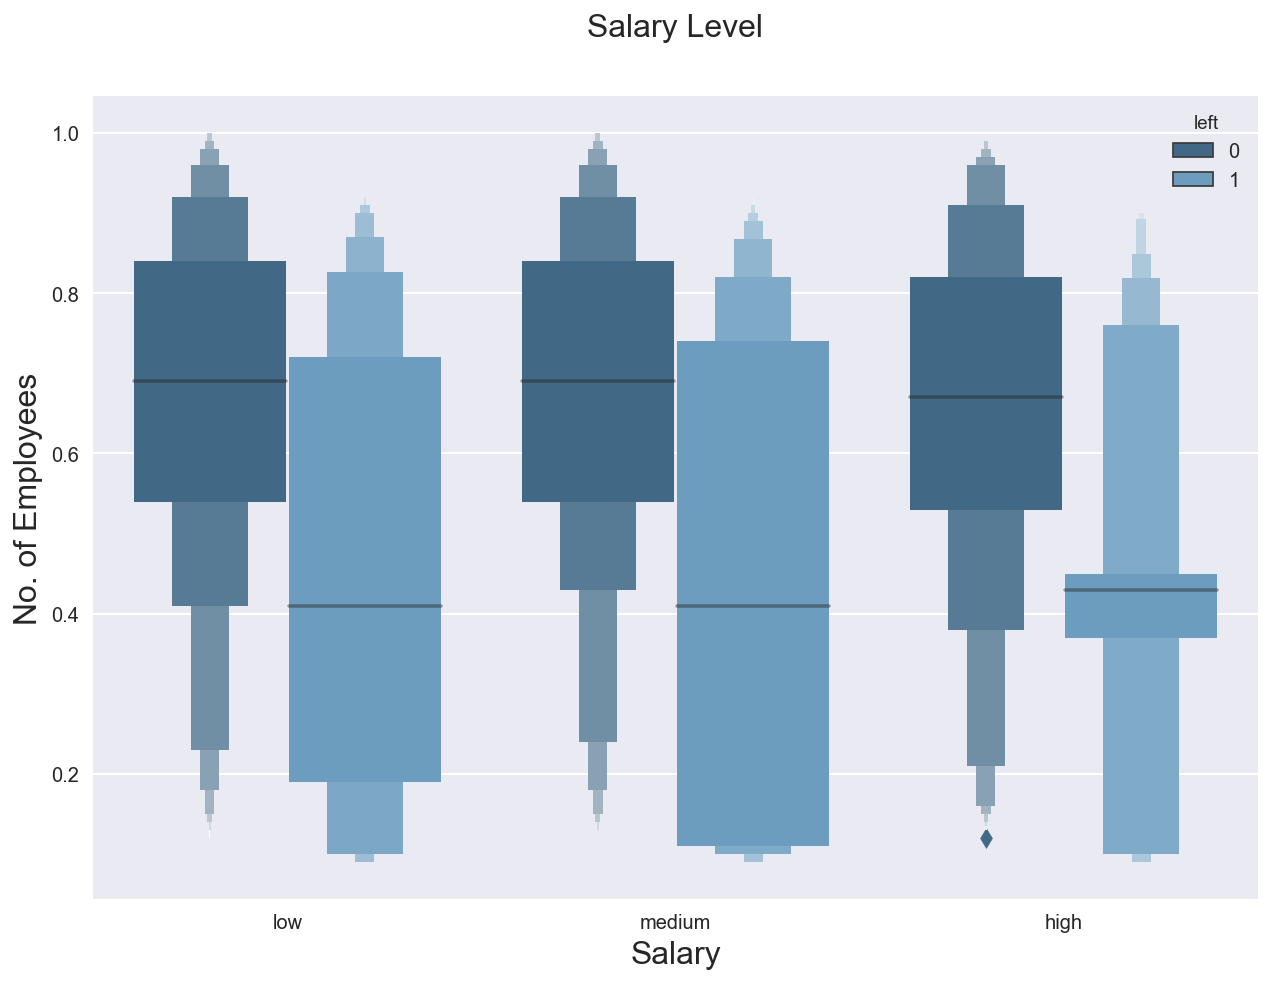

In [39]:
# initialize the matplotlib figure
f, ax = plt.subplots(figsize= (9,7))

# plot salary levels distribution
ax = sns.boxenplot(x= 'salary', y= 'satisfaction_level', data= data, hue= 'left', palette= 'Blues_d')


# add a legend and informative axis label
ax.set_xlabel('Salary', fontsize = 16)
ax.set_ylabel('No. of Employees', fontsize = 16)
ax.set_title('Salary Level', loc='center', pad= 30, fontsize= 16)

plt.tight_layout()
plt.show()

#### Salaries by Department

In [40]:
data.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [56]:
# group by department
salary_dept= data.groupby(['department','salary']).agg({'salary':'count'})

# rename 'salary' column
salary_dept.rename(columns= {'salary':'no_of_emp'}, inplace = True)

salary_dept.head(10)

no_of_emp
department salary           
IT         high           83
           low           609
           medium        535
RandD      high           51
           low           364
           medium        372
accounting high           74
           low           358
           medium        335
hr         high           45

In [67]:
salary_dept.index[0][1]

'high'

In [64]:
salary_pivot = pd.pivot(values= salary_dept.no_of_emp, index= data.)

MultiIndex([(         'IT',   'high'),
            (         'IT',    'low'),
            (         'IT', 'medium'),
            (      'RandD',   'high'),
            (      'RandD',    'low'),
            (      'RandD', 'medium'),
            ( 'accounting',   'high'),
            ( 'accounting',    'low'),
            ( 'accounting', 'medium'),
            (         'hr',   'high'),
            (         'hr',    'low'),
            (         'hr', 'medium'),
            ( 'management',   'high'),
            ( 'management',    'low'),
            ( 'management', 'medium'),
            (  'marketing',   'high'),
            (  'marketing',    'low'),
            (  'marketing', 'medium'),
            ('product_mng',   'high'),
            ('product_mng',    'low'),
            ('product_mng', 'medium'),
            (      'sales',   'high'),
            (      'sales',    'low'),
            (      'sales', 'medium'),
            (    'support',   'high'),
            (    'support

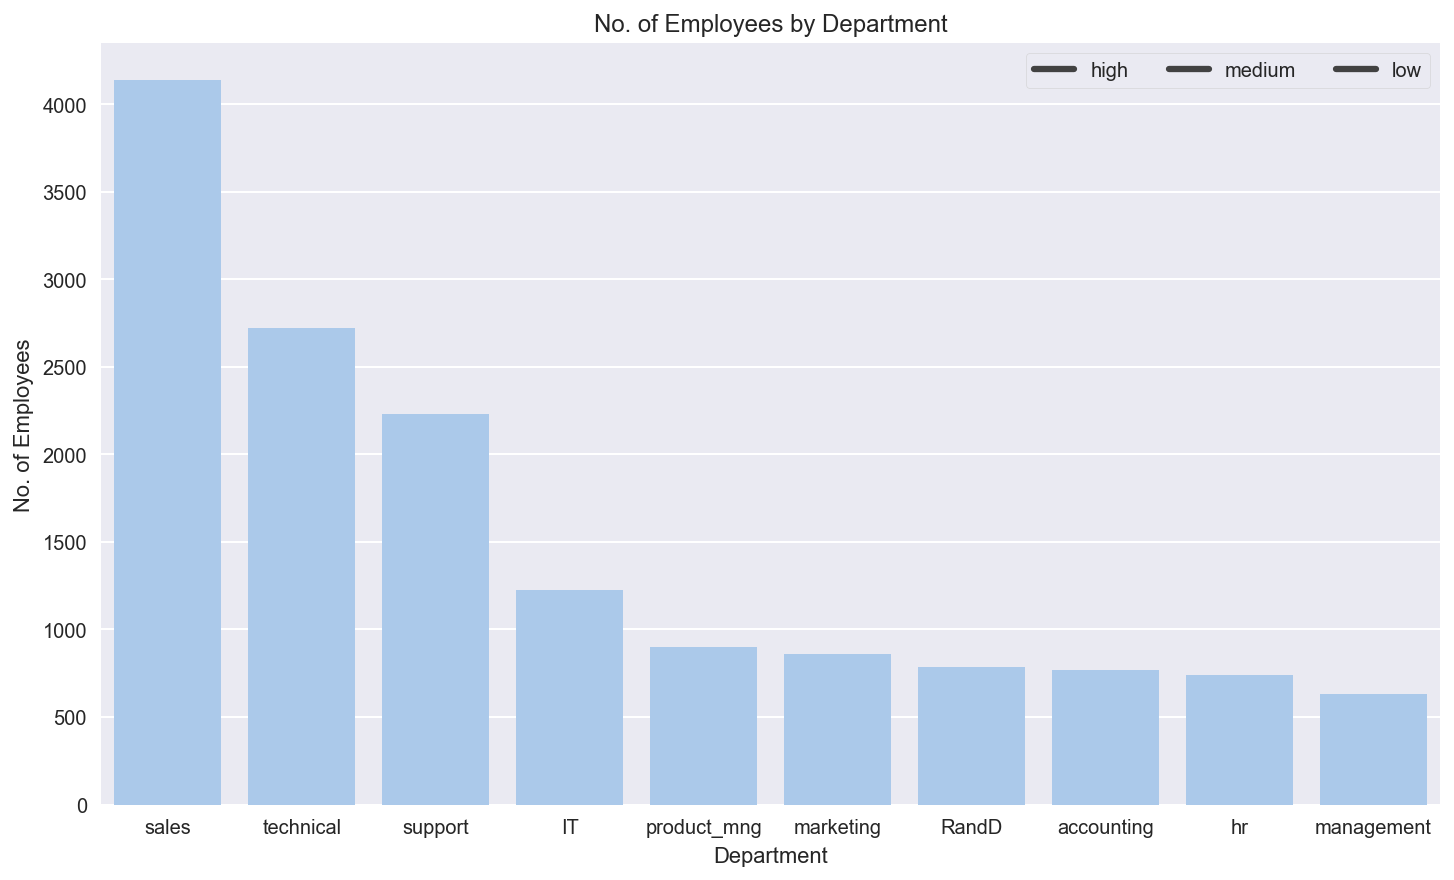

In [41]:
# initialize the matplotlib figure
f, ax = plt.subplots(figsize= (12,7))

# plot the total number of employees by department
sns.set_color_codes('pastel')
sns.barplot(x= data.department.value_counts().index, y= data.department.value_counts().values, color='b')

# plot salary level by department
#sns.set_color_codes('muted')
#sns.barplot(x= data.salary.value_counts().index, y= data.salary.value_counts().values, color= 'b')

# add a legend and informative axis label
ax.legend(labels= ['high', 'medium','low'], ncol= 3, loc= "upper right", frameon= True)
ax.set(ylabel= 'No. of Employees', xlabel= "Department", title= 'No. of Employees by Department')#, fontsize= 16)
#sns.despine(left=True, bottom=True)

plt.show()

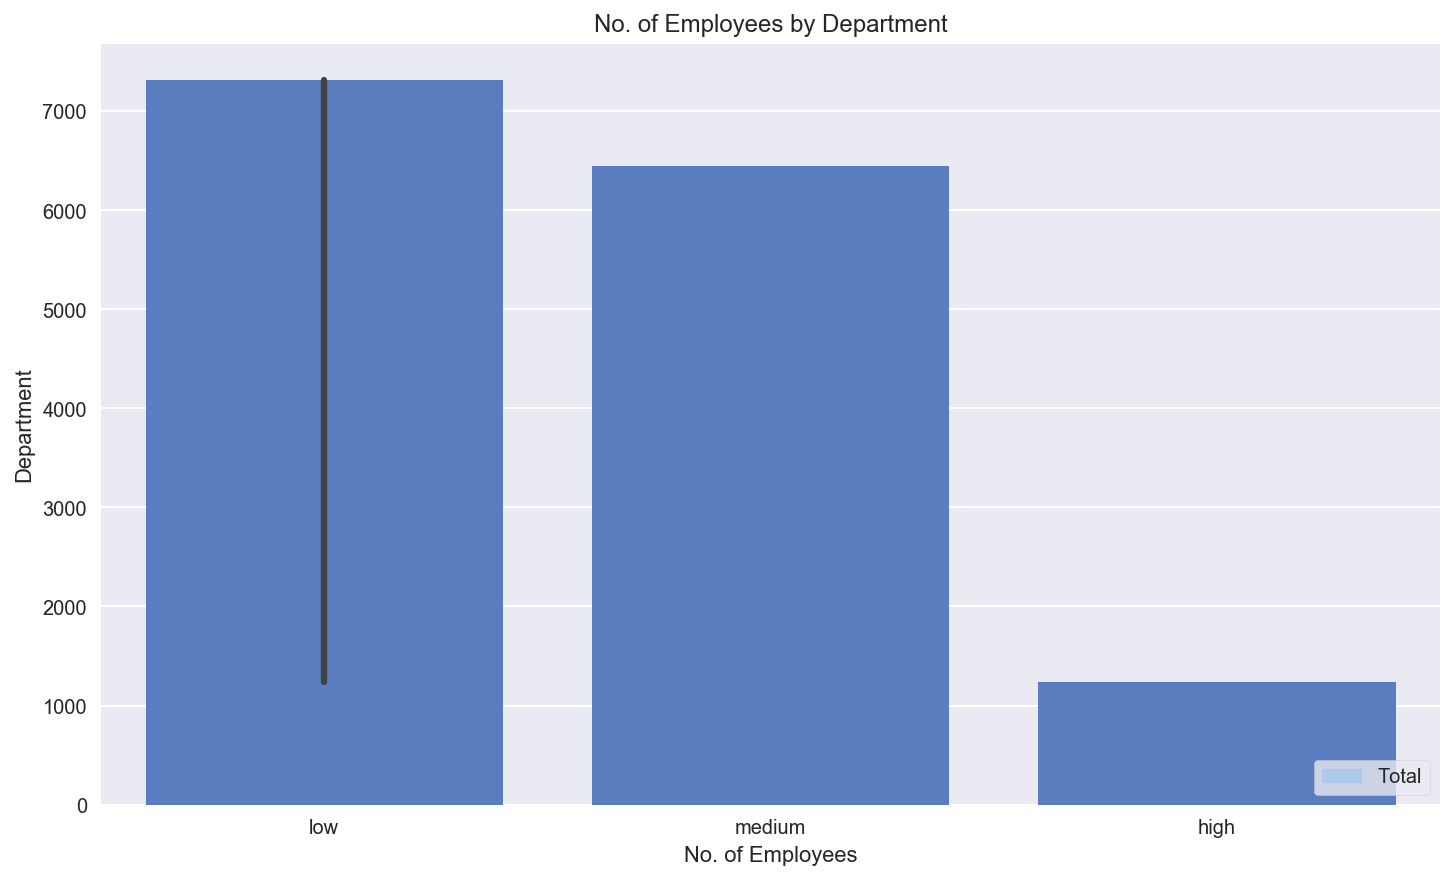

'\nsns.catplot(x=\'department\',\n            y=\'satisfaction_level\',\n            hue=\'salary\',data = data,\n            kind="bar",\n            height=10,\n           aspect=1)\nplt.show()\n'

In [42]:
# initialize the matplotlib figure
f, ax = plt.subplots(figsize= (12,7))

# plot total number of employees by department
sns.set_color_codes('pastel')
sns.barplot(x= 'department', y= data.salary.value_counts().values, data= data,
            label= 'Total', color= 'b')

# plot salary level by department
sns.set_color_codes('muted')
sns.barplot(x= data.salary.value_counts().index, y= data.salary.value_counts().values, color= 'b')

# add a legend and informative axis label
ax.legend(ncol= 2, loc= "lower right", frameon= True)
ax.set(ylabel= 'Department', xlabel= "No. of Employees", title= 'No. of Employees by Department')#, fontsize= 16)
#sns.despine(left=True, bottom=True)

plt.show()
'''
sns.catplot(x='department',
            y='satisfaction_level',
            hue='salary',data = data,
            kind="bar",
            height=10,
           aspect=1)
plt.show()
'''

#### Salary level of the employees that left

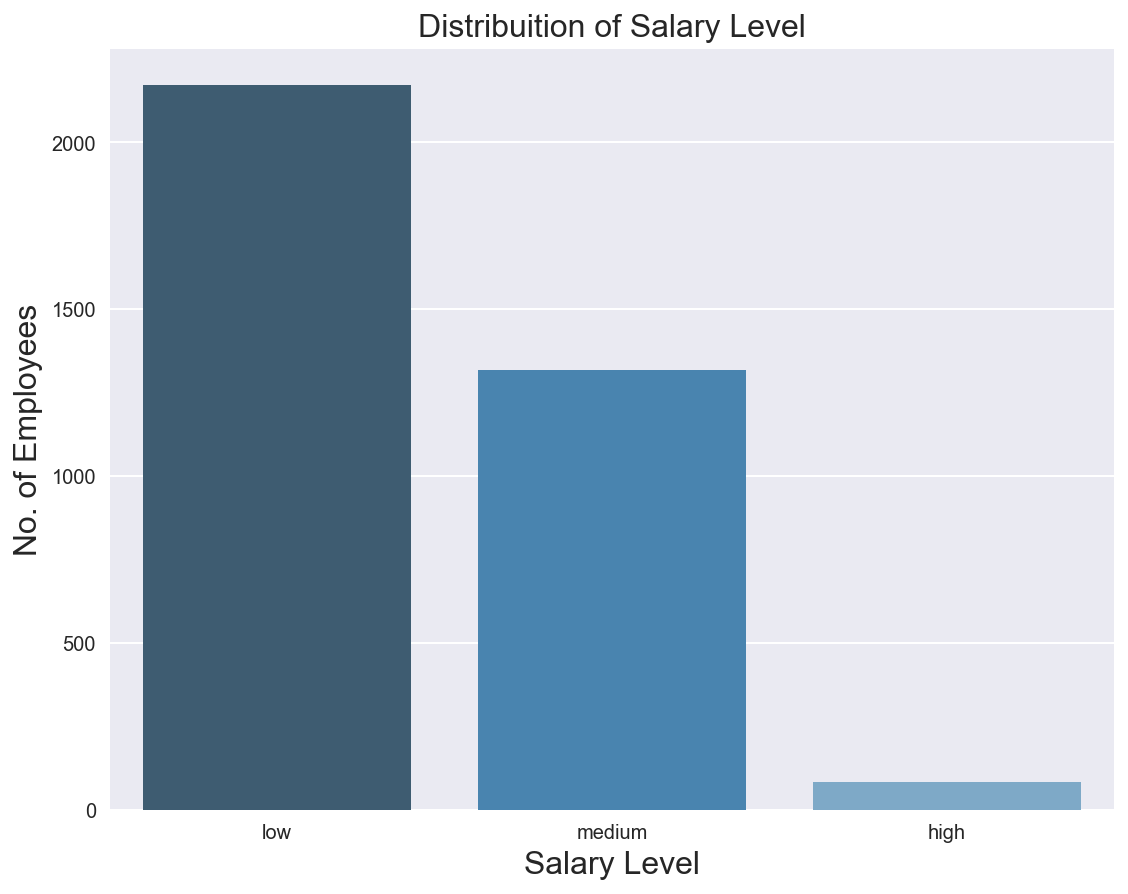

In [43]:
# ploting satisfaction levels distribution for the employees that left
plt.subplots(figsize=(9,7))
sns.barplot(x=emp_quit.salary.value_counts().index,
            y=emp_quit.salary.value_counts().values,
            palette='Blues_d')
plt.xlabel('Salary Level', fontsize = 16)
plt.ylabel('No. of Employees', fontsize = 16)
plt.title('Distribuition of Salary Level', fontsize = 16)
plt.show()

In [47]:
# percentage with high salary

In [44]:
# percentage of employees that get low or medium salaries
100*(emp_quit.loc[(emp_quit['salary'] == 'low') | (emp_quit['salary'] == 'medium'), 'left'].sum() / emp_quit.left.sum()).round(2)

98.0

### Average weekly work hours

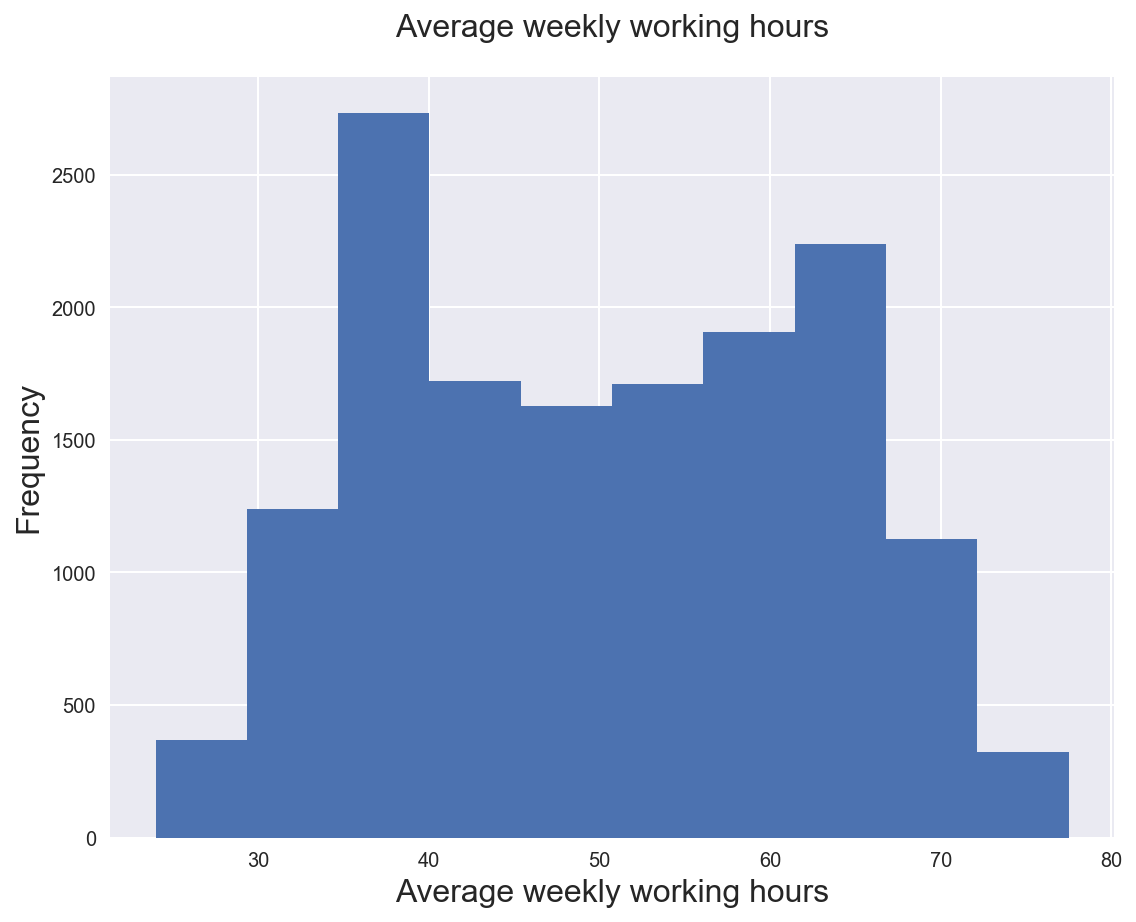

In [68]:
#average weekly work hours
# initialize the matplotlib figure
f, ax = plt.subplots(figsize= (9,7))

# plot the average weekly working hours
plt.hist(data.avg_weekly_hours)#,bins = 5)

# add a legend and informative axis label
ax.set_ylabel('Frequency', fontsize= 16)
ax.set_xlabel('Average weekly working hours', fontsize= 16)
ax.set_title('Average weekly working hours', loc='center', pad= 20, fontsize= 16)

plt.show()

In [69]:
# add column to label overwork/regular work
data['awwh_bin'] = data['avg_weekly_hours'].apply(lambda x: 'overwork' if x>40 else 'regular')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,avg_weekly_hours,years_bin,awwh_bin
0,0.38,0.53,2,157,3,0,1,0,sales,low,39.25,less than 3,regular
1,0.80,0.86,5,262,6,0,1,0,sales,medium,65.50,3 to 6,overwork
2,0.11,0.88,7,272,4,0,1,0,sales,medium,68.00,3 to 6,overwork
3,0.72,0.87,5,223,5,0,1,0,sales,low,55.75,3 to 6,overwork
4,0.37,0.52,2,159,3,0,1,0,sales,low,39.75,less than 3,regular


In [72]:
data.awwh_bin.value_counts()

overwork    10659
regular      4340
Name: awwh_bin, dtype: int64

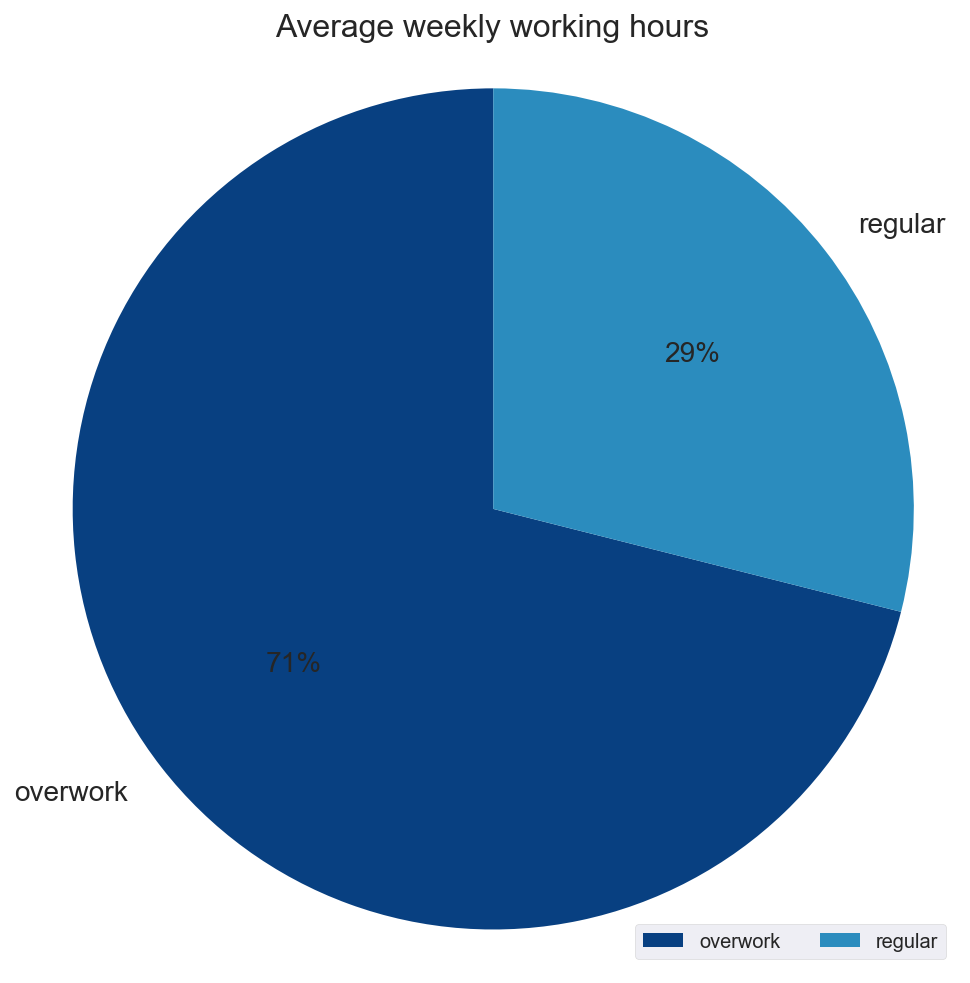

In [89]:
#pie chart proportion of WWH less or equal to 40h, and higher than 40h

# initialize the matplotlib figure
f, ax = plt.subplots(figsize= (7,7))

# labels and colors
awwh_pie_labels = data.awwh_bin.value_counts().index
awwh_cmap = plt.get_cmap('GnBu_r')
awwk_colors = [awwh_cmap(1 * i/len(years.ratio_total)) for i in range(len(years.ratio_total))]
#awwk_colors = 'Blues_d'

# plot total number of years in the company
ax.pie(data.awwh_bin.value_counts() / len(data.awwh_bin), labels= awwh_pie_labels, colors= awwk_colors,
       autopct='%1.0f%%', startangle=90, textprops={'fontsize': 14})

# add a legend and informative axis label
ax.axis('equal')
ax.legend(ncol= 2, loc= "lower right", frameon= True, fontsize= 10)
ax.set_title('Average weekly working hours', loc='center', pad= 10, fontsize= 16)

plt.tight_layout()
plt.show()

In [87]:
# dataframe only with the employees that left the company
emp_left = data[data.left == 1]
emp_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,avg_weekly_hours,years_bin,awwh_bin
0,0.38,0.53,2,157,3,0,1,0,sales,low,39.25,less than 3,regular
1,0.80,0.86,5,262,6,0,1,0,sales,medium,65.50,3 to 6,overwork
2,0.11,0.88,7,272,4,0,1,0,sales,medium,68.00,3 to 6,overwork
3,0.72,0.87,5,223,5,0,1,0,sales,low,55.75,3 to 6,overwork
4,0.37,0.52,2,159,3,0,1,0,sales,low,39.75,less than 3,regular


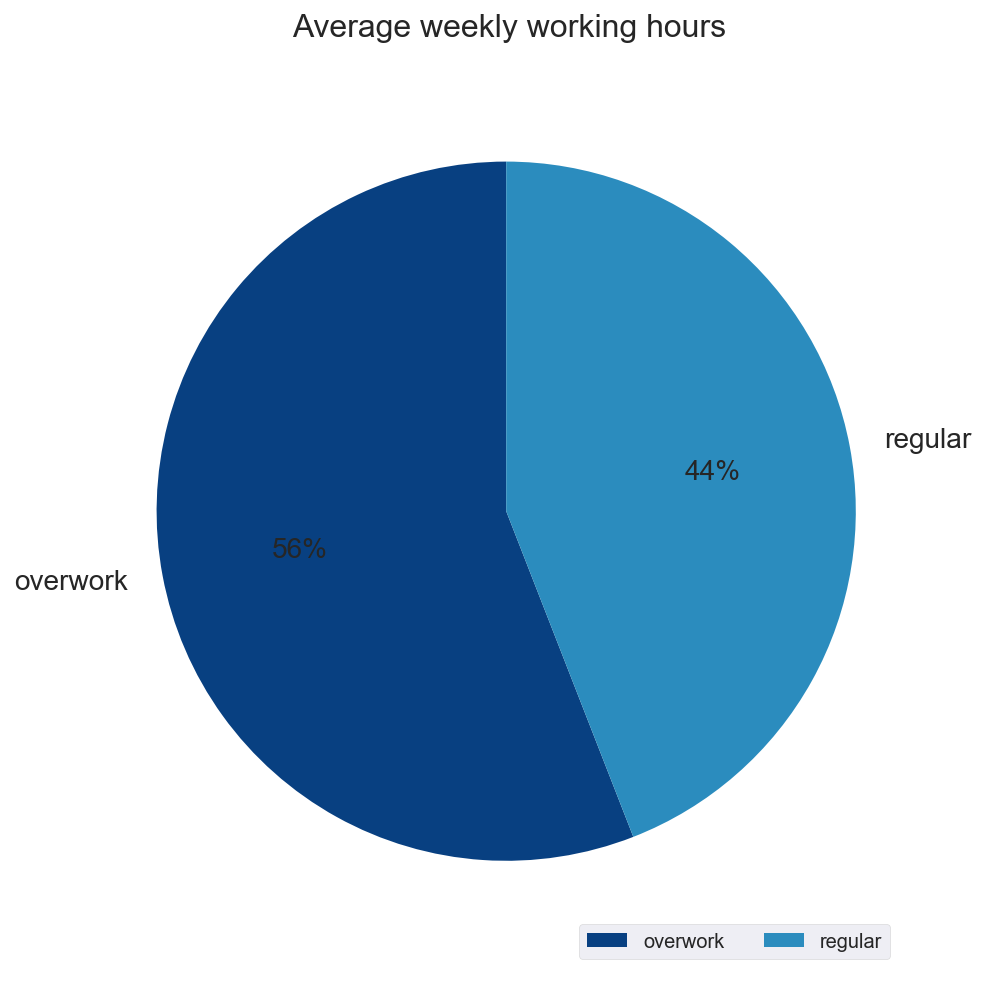

In [88]:
# initialize the matplotlib figure
f, ax = plt.subplots(figsize= (7,7))

# labels and colors
awwh_pie_labels = emp_left.awwh_bin.value_counts().index
awwh_cmap = plt.get_cmap('GnBu_r')
awwk_colors = [awwh_cmap(1 * i/len(years.ratio_total)) for i in range(len(years.ratio_total))]
#awwk_colors = 'Blues_d'

# plot total number of years in the company
ax.pie(emp_left.awwh_bin.value_counts() / len(emp_left.awwh_bin), labels= awwh_pie_labels, colors= awwk_colors,
       autopct='%1.0f%%', startangle=90, textprops={'fontsize': 14})

# add a legend and informative axis label
ax.axis('equal')
ax.legend(ncol= 2, loc= "lower right", frameon= True, fontsize= 10)
ax.set_title('Average weekly working hours', loc='center', pad= 10, fontsize= 16)

plt.tight_layout()
plt.show()